In [2]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import seaborn
import plotly
import matplotlib.pyplot as plt


In [3]:
df_eda = pd.read_csv('../data/sales_train.csv') 

In [4]:
test = pd.read_csv('../data/submission_data/test.csv')

In [5]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [6]:
items_categories.shape

NameError: name 'items_categories' is not defined

In [ ]:
test['shop_id'].value_counts()

shop_id
5     5100
56    5100
53    5100
52    5100
47    5100
48    5100
57    5100
58    5100
59    5100
55    5100
36    5100
4     5100
37    5100
35    5100
38    5100
34    5100
46    5100
41    5100
44    5100
39    5100
49    5100
50    5100
42    5100
19    5100
6     5100
3     5100
2     5100
7     5100
10    5100
12    5100
28    5100
31    5100
26    5100
25    5100
22    5100
24    5100
21    5100
15    5100
16    5100
18    5100
14    5100
45    5100
Name: count, dtype: int64

In [ ]:
sample_sub = pd.read_csv('../data/submission_data/sample_submission.csv')

In [ ]:
sample_sub

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [ ]:
# df_eda[df_eda['date_block_num']==0]['shop_id'].unique() # Check how many shops are generrally might be selling anything during the month

In [ ]:
df_eda.head(50)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [ ]:
df_eda.shape

(2935849, 6)

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
df_eda.isnull().sum()


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_eda[['item_price','item_cnt_day']].describe())

       item_price  item_cnt_day
count 2935849.000   2935849.000
mean      890.853         1.243
std      1729.800         2.619
min        -1.000       -22.000
25%       249.000         1.000
50%       399.000         1.000
75%       999.000         1.000
max    307980.000      2169.000


In [ ]:
df_eda.duplicated().sum()

6

In [ ]:
df_eda[df_eda.duplicated(keep=False)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76961,05.01.2013,0,54,20130,149.0,1.0
76962,05.01.2013,0,54,20130,149.0,1.0
1435365,23.02.2014,13,50,3423,999.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496765,23.03.2014,14,21,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671872,01.05.2014,16,50,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866322,12.07.2014,18,25,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0


In [ ]:
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%d.%m.%Y')

It’s worth taking a look at sales across different locations/stores over the entire time period.
Additionally, I’d like to understand how many items—regardless of category—were sold overall in different store locations. It seems that shop_id will carry the most weight among the features, based on the logic that each store is located in a unique place, and a store’s location generally correlates with the number of items sold per day.

Based on this, we can also create a feature representing the total number of items sold over all time in a store per day (preferably using the average or log-scaled value). To this, we can add the day of the week as it will also likely correlate with the number of items sold.

In [ ]:
df_eda['shop_id'].value_counts().shape

(60,)

In [ ]:
df_sorted = df_eda.sort_values('date')


In [ ]:
df_sorted

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0
...,...,...,...,...,...,...
2885098,2015-10-31,33,41,21386,169.0,1.0
2930981,2015-10-31,33,21,988,199.0,1.0
2885097,2015-10-31,33,41,21377,169.0,1.0
2930993,2015-10-31,33,22,10207,1199.0,1.0


In [ ]:
monthly_sales = (
    df_eda.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)
    .agg({'item_cnt_day': 'sum'})
    .rename(columns={'item_cnt_day': 'item_cnt_month'})
)

In [ ]:
monthly_sales

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [ ]:
shop_sales = df_eda.groupby(['shop_id'], as_index=False).agg({'item_cnt_day': 'sum'}) # Amount of all sold products across all shops over the whole period

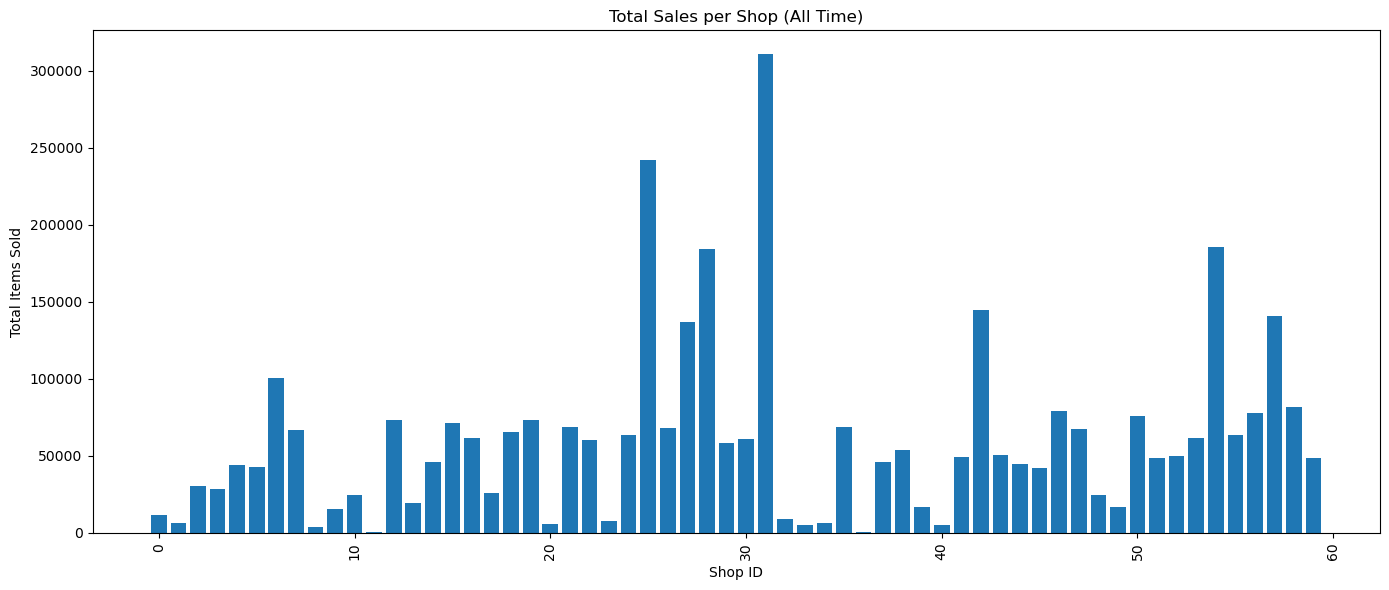

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(shop_sales['shop_id'], shop_sales['item_cnt_day'])
plt.xlabel('Shop ID')
plt.ylabel('Total Items Sold')
plt.title('Total Sales per Shop (All Time)')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

We can see that the number of stores with extremely low total sales is roughly equal to the number of stores with high total sales. Most store sales over the entire period fluctuate around an approximate average, with a deviation of about 15–30%.

Now it’s worth taking a look at what kinds of products are actually being sold.

In [ ]:
items = pd.read_csv('../data/dicts/items.csv')

In [ ]:
items[70:140].head(50)

,item_name,item_id,item_category_id
70,"101 совет начинающим разработчикам в системе ""...",70,49
71,11 ДРУЗЕЙ ОУШЕНА WB (BD),71,37
72,11 ДРУЗЕЙ ОУШЕНА WB (регион),72,40
73,11-11-11 (регион),73,40
74,12 ДРУЗЕЙ ОУШЕНА WB (BD),74,37
75,12 ДРУЗЕЙ ОУШЕНА WB (регион),75,40
76,12 ЛЕТ РАБСТВА (BD),76,37
77,12 ЛЕТ РАБСТВА (регион),77,40
78,12 МЕСЯЦЕВ,78,40
79,12 МЕСЯЦЕВ. НОВАЯ СКАЗКА,79,40


In [ ]:
items_categories = pd.read_csv('../data/dicts/item_categories.csv')

In [ ]:
items_categories.head(50)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


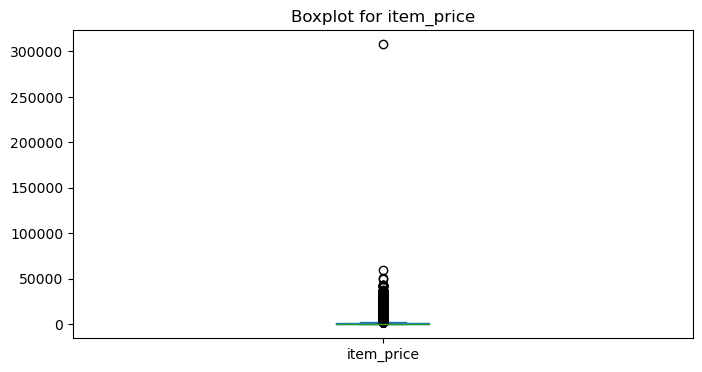

In [ ]:

plt.figure(figsize=(8, 4))
df_eda['item_price'].plot.box()
plt.title('Boxplot for item_price')
plt.show()

In [ ]:
shops = pd.read_csv('../data/dicts/shops.csv')

In [ ]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
df_eda

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [ ]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


Now let's check if we can switch to the names provided in data-dictionaries instead of _id 

In [ ]:
df_eda['shop_id'].isin(shops['shop_id']).sum() - df_eda.shape[0]

0

In [ ]:
df_eda['shop_id'].isin(items['item_id']).sum() - df_eda.shape[0]

0

In [ ]:
df_eda['shop_id'].isin(items_categories['item_category_id']).sum() - df_eda.shape[0]

0

---

Checkpoint:
 - We have several duplicates
 - Seems no Null values
 - Outliers in 'item_price'
 - No inconcistency in data, all id's are listed in dicts
  
Df:
 - df_eda with converted dates and no courses 
 - df_sorted with sorted observations by dates 
 - shops as dict 
 - items_categories as dict 
 - items as dict
 - shop_sales with how many products every shop sold over the whole preioud of time 

In [ ]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
items.columns

Index(['item_name', 'item_id', 'item_category_id'], dtype='object')

In [ ]:
# items_categories.rename(columns ={'item_category_id':'item_id'}, inplace=True)

In [ ]:
# items_categories['item_category_name'] = items_categories['item_category_name'].astype(str)

In [ ]:
items_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2935849 entries, 49800 to 2928850
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


In [ ]:
df_sorted = df_sorted.merge(items[['item_category_id','item_id','item_name']], on='item_id', how='left')
# df_sorted = df_sorted.merge(items[['item_category_id','item_id','item_name']], on='item_id', how='left')

In [ ]:
# df_sorted['item_category_name'].isnull().sum()
df_sorted['item_category_id'].isnull().sum()

0

In [ ]:
df_sorted

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_name
0,2013-01-01,0,18,5823,2500.0,1.0,35,Playstation Store пополнение бумажника: Карта ...
1,2013-01-01,0,27,5573,849.0,1.0,2,PS Move Motion Controller Charger (Зарядная ст...
2,2013-01-01,0,7,1006,399.0,1.0,67,3D Crystal Puzzle Дельфин XL
3,2013-01-01,0,19,17707,899.0,1.0,19,Праздник спорта (Essentials) (только для PS Mo...
4,2013-01-01,0,14,19548,149.0,1.0,40,ТАКИЕ РАЗНЫЕ БЛИЗНЕЦЫ (регион)
...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,41,21386,169.0,1.0,40,ХОББИТ: ПУСТОШЬ СМАУГА (регион)
2935845,2015-10-31,33,21,988,199.0,1.0,37,38-Я ПАРАЛЛЕЛЬ (BD)
2935846,2015-10-31,33,41,21377,169.0,1.0,40,ХОББИТ: НЕЖДАННОЕ ПУТЕШЕСТВИЕ (регион)
2935847,2015-10-31,33,22,10207,1199.0,1.0,30,"Ведьмак 3: Дикая охота [PC, Jewel, русская вер..."


In [ ]:
items_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
df_sorted = df_sorted.merge(items_categories, on = 'item_category_id', how = 'left')

In [ ]:
df_sorted

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,item_name,item_category_name
0,2013-01-01,0,18,5823,2500.0,1.0,35,Playstation Store пополнение бумажника: Карта ...,Карты оплаты - PSN
1,2013-01-01,0,27,5573,849.0,1.0,2,PS Move Motion Controller Charger (Зарядная ст...,Аксессуары - PS3
2,2013-01-01,0,7,1006,399.0,1.0,67,3D Crystal Puzzle Дельфин XL,Подарки - Развитие
3,2013-01-01,0,19,17707,899.0,1.0,19,Праздник спорта (Essentials) (только для PS Mo...,Игры - PS3
4,2013-01-01,0,14,19548,149.0,1.0,40,ТАКИЕ РАЗНЫЕ БЛИЗНЕЦЫ (регион),Кино - DVD
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,41,21386,169.0,1.0,40,ХОББИТ: ПУСТОШЬ СМАУГА (регион),Кино - DVD
2935845,2015-10-31,33,21,988,199.0,1.0,37,38-Я ПАРАЛЛЕЛЬ (BD),Кино - Blu-Ray
2935846,2015-10-31,33,41,21377,169.0,1.0,40,ХОББИТ: НЕЖДАННОЕ ПУТЕШЕСТВИЕ (регион),Кино - DVD
2935847,2015-10-31,33,22,10207,1199.0,1.0,30,"Ведьмак 3: Дикая охота [PC, Jewel, русская вер...",Игры PC - Стандартные издания


In [ ]:
items_categories.head(50)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [ ]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


### Draft

<Axes: >

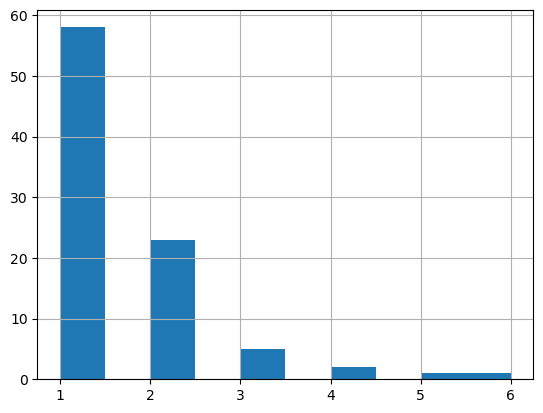

In [ ]:
#df_eda['item_cnt_day'][df_eda['item_cnt_day'] > 100].value_counts().sort_index().plot(kind='bar', figsize=(20, 5))
df_eda['item_cnt_day'][df_eda['item_cnt_day'] > 100].value_counts().hist()

In [ ]:
def clip_percentiles(df, column, lower=0.01, upper=0.99):
    low = df[column].quantile(lower)
    high = df[column].quantile(upper)
    return df[(df[column] >= low) & (df[column] <= high)]
sales = clip_percentiles(df= sales, column='item_price')
sales = clip_percentiles(df= sales, column='item_cnt_day')
sales.shape

# sales[sales['item_price']<5]['item_id'].value_counts().head(50)
# sales[sales['item_price']>5999]['item_id'].value_counts().head(50)


<Axes: >

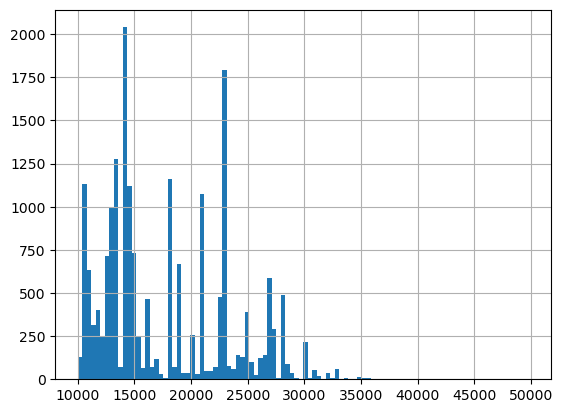

In [ ]:
df_sorted[(df_sorted['item_price']>10000)&(df_sorted['item_price']<50000)]['item_price'].hist(bins=100)

<Axes: >

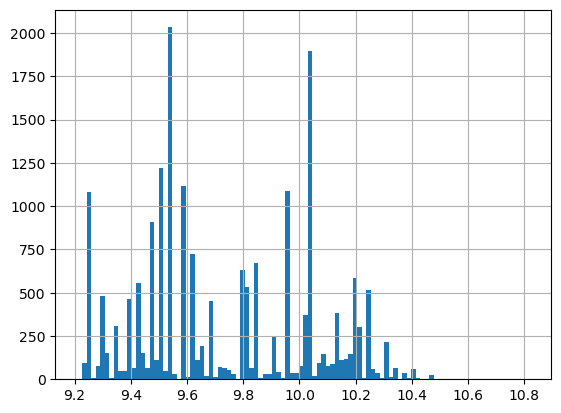

In [ ]:
np.log1p(df_sorted[(df_sorted['item_price']>10000)&(df_sorted['item_price']<50000)]['item_price']).hist(bins=100)

In [7]:
sales_cleaned = pd.read_csv('../data/output/sales_cleaned.csv')

In [9]:
sales_cleaned.shape

(2927619, 14)